In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, roc_curve, recall_score, roc_auc_score, mean_squared_error, mean_absolute_error
from math import sqrt, log
from sklearn.metrics import accuracy_score, classification_report, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RidgeClassifier
import graphviz

from sklearn.tree import tree, export_graphviz, DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from matplotlib import pyplot as plt
from IPython.display import Image, display
from sklearn.utils import class_weight
from xgboost import XGBClassifier
import xgboost
import re
%matplotlib inline
#plt.style.use('ggplot')
SEED = 42

pd.set_option('display.max_columns', 500)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [187]:
def put_data_into_dict():
    
    d = {}
    
    link_wave_2 = "../data/raw_datasets/next_steps/wave_2/wave_two_lsype_young_person_file_16_06_08.dta"
    link_wave_2_family = "../data/raw_datasets/next_steps/wave_2/wave_two_lsype_parental_attitudes_file_16_06_08.dta"
    link_wave_2_family_b = "../data/raw_datasets/next_steps/wave_2/wave_two_lsype_family_background_file_16_06_08.dta"
    
    link_wave_3 = "../data/raw_datasets/next_steps/wave_3/wave_three_lsype_young_person_file_16_06_08.dta" 
    link_wave_3_family = "../data/raw_datasets/next_steps/wave_3/wave_three_lsype_parental_attitudes_file_16_06_08.dta"
    link_wave_3_family_b = "../data/raw_datasets/next_steps/wave_3/wave_three_lsype_family_background_file_16_06_08.dta"

    link_wave_4 = "../data/raw_datasets/next_steps/wave_4/wave_four_lsype_young_person_september_2009.dta"
    link_wave_4_family = "../data/raw_datasets/next_steps/wave_4/wave_four_lsype_parental_attitudes_june_2009.dta"
    link_wave_4_family_b = "../data/raw_datasets/next_steps/wave_4/wave_four_lsype_family_background_september_2009.dta"
    
    link_wave_5 = "../data/raw_datasets/next_steps/wave_5/wave_5.csv"
    link_wave_5_family = "../data/raw_datasets/next_steps/wave_5/wave_5_family_background.csv"

    link_wave_6 = "../data/raw_datasets/next_steps/wave_6/Wave_6.csv"

    link_wave_7 = "../data/raw_datasets/next_steps/wave_7/wave_7.csv"

    link_wave_8 = "../data/raw_datasets/next_steps/wave_8/wave_8.csv"
    link_wave_8_activity_history = "../data/raw_datasets/next_steps/wave_8/ns8_2015_activity_history.dta"
    link_wave_8_benefits_unfolding_brackets = "../data/raw_datasets/next_steps/wave_8/ns8_2015_benefits_unfolding_brackets.dta"
    link_wave_8_benefits = "../data/raw_datasets/next_steps/wave_8/ns8_2015_benefits.dta"
    link_wave_8_children = "../data/raw_datasets/next_steps/wave_8/ns8_2015_children.dta"
    link_wave_8_derived = "../data/raw_datasets/next_steps/wave_8/ns8_2015_derived.dta"
    link_wave_8_household_members = "../data/raw_datasets/next_steps/wave_8/ns8_2015_household_members.dta"
    link_wave_8_outcomes = "../data/raw_datasets/next_steps/wave_8/ns8_2015_outcomes.dta"
    link_wave_8_partnerships = "../data/raw_datasets/next_steps/wave_8/ns8_2015_partnerships.dta"
    link_wave_8_self_completion = "../data/raw_datasets/next_steps/wave_8/ns8_2015_self_completion.dta"
    
    
    df_wave_2 = pd.read_stata(link_wave_2, encoding ='latin1')
    df_wave_2_family = pd.read_stata(link_wave_2_family, encoding ='latin1')
    df_wave_2_family_b = pd.read_stata(link_wave_2_family_b, encoding ='latin1')

    df_wave_3 = pd.read_stata(link_wave_3, encoding ='latin1')
    df_wave_3_family = pd.read_stata(link_wave_3_family, encoding ='latin1')
    df_wave_3_family_b = pd.read_stata(link_wave_3_family_b, encoding ='latin1')

    df_wave_4 = pd.read_stata(link_wave_4, encoding ='latin1')
    df_wave_4_family = pd.read_stata(link_wave_4_family, encoding ='latin1')
    df_wave_4_family_b = pd.read_stata(link_wave_4_family_b, encoding ='latin1')

    df_wave_5 = pd.read_csv(link_wave_5)
    df_wave_5_family = pd.read_csv(link_wave_5_family)

    df_wave_6 = pd.read_csv(link_wave_6, encoding ='latin1')

    df_wave_7 = pd.read_csv(link_wave_7, encoding ='latin1')

    df_wave_8 = pd.read_csv(link_wave_8, encoding ='latin1')
    
    df_wave_8_activity_history = pd.read_stata(link_wave_8_activity_history, encoding ='latin1')
    df_wave_8_benefits_unfolding_brackets = pd.read_stata(link_wave_8_benefits_unfolding_brackets, encoding ='latin1')
    df_wave_8_benefits = pd.read_stata(link_wave_8_benefits, encoding ='latin1')
    df_wave_8_children = pd.read_stata(link_wave_8_children, encoding ='latin1')
    df_wave_8_derived = pd.read_stata(link_wave_8_derived, encoding ='latin1')
    df_wave_8_household_members = pd.read_stata(link_wave_8_household_members, encoding ='latin1')
    df_wave_8_outcomes = pd.read_stata(link_wave_8_outcomes, encoding ='latin1')
    df_wave_8_partnerships = pd.read_stata(link_wave_8_partnerships, encoding ='latin1')
    df_wave_8_self_completion = pd.read_stata(link_wave_8_self_completion, encoding ='latin1')
    
    
    d = {"w2":df_wave_2, 
         "w2f":df_wave_2_family,
         "w2fb":df_wave_2_family_b,
         "w3":df_wave_3, 
         "w3f":df_wave_3_family,
         "w3fb":df_wave_3_family_b,
         "w4":df_wave_4, 
         "w4f":df_wave_4_family,
         "w4fb":df_wave_4_family_b,
         "w5":df_wave_5, 
         "w5f":df_wave_5_family, 
         "w6": df_wave_6, 
         "w7":df_wave_7, 
         "w8": df_wave_8, 
         "w8_activity_history": df_wave_8_activity_history, 
         "w8_benefits_unfolding_brackets": df_wave_8_benefits_unfolding_brackets, 
         "w8_benefits": df_wave_8_benefits, 
         "w8_children": df_wave_8_children, 
         "w8_derived": df_wave_8_derived, 
         "w8_household_members": df_wave_8_household_members, 
         "w8_outcomes": df_wave_8_outcomes, 
         "w8_partnerships": df_wave_8_partnerships, 
         "w8_self_completion": df_wave_8_self_completion}
    
    #set index to student id (NSID) for all datasets
    for i in d.keys():
        d[i] = d[i].set_index("NSID")
    
    
    return d

def download_data():
    
    d = put_data_into_dict()
    
    df_marco_v1 = pd.read_stata("../data/raw_datasets/next_steps/Wave 1-8.dta", encoding ='latin1') 
    
    return d, df_marco_v1
    
    

In [188]:
d, df_marco_v1 = download_data()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version

In [186]:
d["w3fb"] = d["w3fb"].drop("IDACIRSCORE", axis = 1)


KeyError: "['IDACIRSCORE'] not found in axis"

NSID
NS23533L     0.3
NS24676Q    0.27
NS21482P    0.18
NS25978V    0.08
NS15856R    0.46
            ... 
NS18853A    0.11
NS24044R     0.6
NS11991J    0.12
NS15721A    0.03
NS13000D     0.3
Name: IDACIRSCORE, Length: 13539, dtype: category
Categories (97, object): [Insufficient Information < 0 < 0.01 < 0.02 ... 0.94 < 0.96 < 0.98 < 0.99]

In [310]:
def join_all_df(d):
    
    d = d.copy()
    
    d["w3fb"] = d["w3fb"].drop("IDACIRSCORE", axis = 1)

    l = [d["w8"], 
         d["w8_derived"],
         d["w7"],  
         d["w6"], 
         d["w5"], 
         d["w4"], 
         d["w3"], 
         d["w2"], 
         d["w5f"], 
         d["w4f"], 
         d["w3f"], 
         d["w2f"],
         d["w4fb"], 
         d["w3fb"], 
         d["w2fb"]]
    
    df_all = pd.concat(l, axis = 1, join = "inner")

    return df_all

def pick_marcos_variables(df_marco, df_all):
    
    l_missing_var = ['W1inc1est', 
              'fatalism2', 
              'lucky', 
              'hardwork', 
              'pessimism2', 
              'MERGE4', 
              'W4loneparent', 
              'merge7', 
              'hardworking', 
              'W1Ed1bMP', 
              'merge5', 
              'W4membershousehold', 
              'merge4par', 
              'russell', 
              'otheretnicity', 
              'W4FamilyIncome', 
              'employed', 
              'pessimism1', 
              'black', 
              'der', 
              'male', 
              'southasian', 
              'luck', 
              'mixedrace', 
              'merge3', 
              'merge2', 
              'merge2fam', 
              'merge1fam', 
              'merge6', 
              'white', 
              'merge8der', 
              'NSID', 
              'MERGE6', 
              'merge4', 
              'merge3fam', 
              'fatalism1', 
              'parentsHE', 
              'Houseowned', 
              'merge4fam', 
              'degree', 
              'ownership'] 
    
    columns_to_keep = df_marco.columns.to_list()
    
    columns_to_keep = [i for i in columns_to_keep if i not in  l_missing_var]
    
    df_new = df_all[columns_to_keep]
    
    return df_new

def convert_cat_to_type_obj(series):
    
    if (series.dtype != "float32") & (series.dtype != "float64"):
        
        series = series.astype("object")
    
    return series

def convert_string_to_int(df):
    
    df = df.copy()
    
    for col in df.columns:
        
        temp_col = pd.to_numeric(df[col], errors = "coerce")
        
        temp_col[temp_col.isnull()] = df[col][temp_col.isnull()]
        
        df[col] = temp_col
        
    return df

def remove_non_uni_students(df):
    
    df = df[df["W8EVERUNI"] == "Yes"]
    
    return df

def remove_Not_applicable_values(df, var):
    
    df = df[(df[var] != "Not applicable") & (df[var] != "Refused") & (df[var] != "Don't know")]
    
    #df[var] = df[var].astype('category')
    
    return df

def clean_debt_variable(df):
    
    df = df.copy()
    
    df["W8QDEPKP"] = df["W8QDEPKP"].map({"Very easy":"Easy", 
                                         "Fairly easy":"Easy", 
                                         "Not very easy":"Hard", 
                                         "Not at all easy":"Hard"})
    
    df["W8QDEPKP"] = df["W8QDEPKP"].map({"Hard":1, "Easy":0})
   
    return df

def compute_income_variable(df):
    
    '''
    Compute the income variable which is the dependent variable here by using columns W8TOTINA to W8TOTINAB.
    Then delete those columns at the end
        @df: dataframe d["w8"]
    '''

    df = df.copy()
    
    df["income"] = 1
    
    band = ["1", "2", "3", "4"]
    question = ["B", "C", "D", "E"] 
    
    dict_band = {"B1":"less than 25", 
                 "B2":"25 to 90", 
                 "B3":"50 to 90", 
                 "B4":"90 to 140", 
                 "C1":"140 to 240", 
                 "C2":"240 to 300", 
                 "C3":"300 to 350", 
                 "C4":"350 to 400", 
                 "D1":"400 to 500", 
                 "D2":"500 to 600", 
                 "D3":"600 to 700", 
                 "D4":"700 to 800", 
                 "E1":"800 to 900", 
                 "E2":"900 to 1200", 
                 "E3":"1200 to 1400",
                 "E4":"more than 1400"}
    
    #loop through question B to E
    for q in question:
        
        #for each question loop through band 1 to 4 accounting for different range of salaries within each question
        for b in band:

            df["income"][df["W8TOTIN" + q] == "Total income question " + q + " band " + b] = dict_band[q+b]
        
        #drop corresponding column
        df = df.drop("W8TOTIN" + q, axis = 1)
    #Filter only rows with income different that 1 namely those currently working and for who we know the salary
    #df = df[df["income"] != 1]
    
    return df

def remove_missing_values(df):
    
    df = df.dropna(thresh = 180, axis = 0).dropna(thresh = 800, axis = 1)
    df = df.dropna(thresh = 800, axis = 1)
    
    return df


def replace_non_by_mean(df, col):
    
    df = df.copy()
    
    non = ["Don't know", "Not applicable", "Refused", "YP not interviewed"]
    
    df[col][df[col].isin(non)] = round(df[col][np.logical_not(df[col].isin(non))].mean(), 2)
    
    return df

def remove_var(df):
    #WAVE 8
    #1) W8MCHMANY very few students have children so by keeping, models is going to bias on the zero child
    #2) W8EVERUNI we only keep those at uni so only Yes
    #3) Remove all variables of activty because dont affect the student at 20
    #4) W8WRKHRSA relates to full time or part time employment do not concern students 
    #5) W8REPA0A regular payment source from parents at age 25: Let's assume this is a decise prediction
    #and a guy 20 who receives money from parents can repay, then when a student who gets money from parents at age 20
    #this is going to bias the model by saying he's more likely to repay when it's not true
    
    var_without_w8 = [i for i in df.columns if (("W8" not in i) | (i == "W8QDEPKP") | (i == "W8DINCB"))]
    var_without_w8 = list(set(var_without_w8))

    df = df[var_without_w8]
    
    #remove int variables with too many missing values
    df = df.drop("W2Inc1estMP", axis = 1)
    
    #Replace discrete int variables without too many missing values by the mean 
    df = replace_non_by_mean(df, "W4schatYP")
    
    return df
    
    
def processing(d, df_marco):
    
    df = join_all_df(d)
   
    df = pick_marcos_variables(df_marco, df)
  
    df = df.apply(convert_cat_to_type_obj)
    
    df = convert_string_to_int(df)
    
    df = remove_non_uni_students(df)
    
    df = remove_Not_applicable_values(df, "W8QDEPKP")

    df = clean_debt_variable(df)
    
    #df = compute_income_variable(df)
    
    #df = remove_missing_values(df)
    
    df = remove_var(df)
    
    return df



In [311]:
df = processing(d, df_marco_v1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [300]:
c = join_all_df(d)

In [309]:
c["IDACIRSCORE"].dtype

CategoricalDtype(categories=['Insufficient Information',                        0.0,
                                        0.01,                       0.02,
                                        0.03,                       0.04,
                                        0.05,                       0.06,
                                        0.07,                       0.08,
                                        0.09,                        0.1,
                                        0.11,                       0.12,
                                        0.13,                       0.14,
                                        0.15,                       0.16,
                                        0.17,                       0.18,
                                        0.19,                        0.2,
                                        0.21,                       0.22,
                                        0.23,                       0.24,
                           

In [314]:
df["W5debtattYP"][0]

12.0

In [285]:
for i in df["IDACIRSCORE"].value_counts().iteritems():
    print(i)

(0.05, 102)
(0.03, 97)
(0.04, 93)
(0.06, 89)
(0.07, 79)
(0.02, 74)
(0.09, 58)
(0.08, 49)
(0.01, 44)
(0.11, 40)
(0.18, 37)
(0.1, 37)
(0.13, 35)
(0.14, 33)
(0.12, 31)
(0.15, 27)
(0.16, 26)
(0.2, 25)
(0.21, 24)
(0.17, 23)
(0.19, 21)
(0.23, 21)
(0.32, 19)
(0.31, 18)
(0.27, 18)
(0.22, 17)
(0.33, 17)
(0.29, 17)
(0.35, 16)
(0.38, 16)
(0.24, 15)
(0.26, 15)
(0.28, 15)
(0.43, 13)
(0.3, 11)
(0.37, 11)
(0.5, 10)
(0.41, 10)
(0.39, 9)
(0.48, 8)
(0.42, 8)
(0.25, 8)
(0.44, 8)
(0.34, 8)
(0.47, 7)
(0.45, 7)
(0.55, 7)
(0.6, 7)
(0.56, 7)
(0.4, 7)
(0.54, 6)
(0.49, 6)
(0.46, 6)
(0.53, 6)
(0.66, 5)
(0.52, 5)
(0.36, 4)
(0.51, 4)
(0.61, 3)
(0.57, 3)
(0.59, 3)
(0.58, 2)
(0.8, 2)
(0.63, 2)
(0.76, 2)
(0.62, 2)
(0.69, 2)
(0.7, 1)
(0.73, 1)
(0.0, 1)
(0.65, 1)
(0.71, 1)
(0.68, 1)
(0.81, 1)
(0.77, 1)
(0.99, 1)
(0.67, 1)
(0.72, 1)
(0.74, 1)
(0.78, 1)
(0.87, 1)


In [295]:
temp = df.copy()
temp["IDACIRSCORE"] = temp["IDACIRSCORE"].astype("float")


In [296]:
temp["IDACIRSCORE"].dtype

dtype('float64')

In [297]:
temp.groupby("W8QDEPKP")["IDACIRSCORE"].mean()

W8QDEPKP
0    0.165957
1    0.211159
Name: IDACIRSCORE, dtype: float64

In [ ]:
df.groupby()

In [316]:
#identify numerical columns
def identify_num_col(df):
    
    l_num_col = []
    
    for i in df.index[:50]:
        
        for col in df.columns:
           
            if (type(df.loc[i, col]) == float) | (type(df.loc[i, col]) == int):
               
                if col not in l_num_col:
                    
                    l_num_col.append(col)
        
    return l_num_col

l_t = identify_num_col(df)

In [318]:
l_t

['W5debtattYP',
 'IDACIRSCORE',
 'W5AlevNoYP',
 'W4schatYP',
 'W5ASNoYP',
 'W6AlevNoYP',
 'W6als']

# ML model 

In [263]:
#identify numerical columns
def identify_num_col(df):
    
    l_num_col = []
        
    for col in range(len(df.columns)):
     
        if (type(df.iloc[0, col]) == float) | (type(df.iloc[0, col]) == int):
            
            if col not in l_num_col:

                l_num_col.append(df.columns[col])

    return l_num_col


#convert string variables to categorical then to integers 
def encode(df, y_col):
    
    '''
    Encoding method 2
    
    Doing 1 hot encoding on the categorical variables (except the y variable)
        @df: Dataframes with predictors X and variable y (incone)
    '''
    
    df = df.copy()
    col_num = []
    
    
    col_num = identify_num_col(df)
    #add dependent variable that we dont want to encode
    col_num.append(y_col)
    
    df_cat = df.drop(y_col, axis = 1)
   
    df_dummies = pd.get_dummies(df_cat)
   # print("1",df_dummies)
    #print("2", df_cat)
    df = pd.concat([df_dummies, df[col_num]], axis=1)
    
    return df

def train_test_split_method(df, y_col, test_size = 0.15):
    '''
    Divides data into training and test set depending of the method of encoding
    
        @df_filter_students_with_income_clean_hot_method: Dataframe encoded with one hot encoding
        @df_filter_students_with_income_clean_cat_method: Dataframe encoded with cat encoding
        @hot: Boolean if hot encoding is used
    '''
    
    
    X = df.drop(y_col, axis = 1)
    y = df[y_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = SEED, stratify = y)
    
    return X_train, X_test, y_train, y_test


def grid_cv_model(model, param_grid, X_train, y_train, X_test, number_cv = 5, print_score_best = True, score = None):
      
    '''
    Compute a grid search cv for a model
    
        @model: Model with the fixed initialized parameters
        @param_grid: grid parameters for the cv model
        X_train: X training data with predictors already encoded
        y_train: y training data 
        X_test: X test data with predictors already encoded
        number_cv: Number of cross folders for each model 
        print_score_best: Boolean see the performance and parameters of the best model
        score: loss function to use in the CV
    '''
    model_cv = GridSearchCV(model, param_grid, cv = number_cv, scoring = score)
    
    model_cv.fit(X_train, y_train)
    
    if print_score_best == True: 
        
        print("Best model is ", model_cv.best_params_)
        print("Best model score is ", model_cv.best_score_)
    
    best_model = model_cv.best_estimator_
    
    return best_model

In [264]:
#all functions to evaluate a binary model
def plot_confusion_matrix_t(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    Prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.figure()
    
    
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(12,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

def get_features_importance(model, X):

    plt.figure()
    
    features_importance = pd.Series(model.feature_importances_, index = X.columns)

    sorted_importances_rf = features_importance.sort_values()[-20:]
    
    print(sorted_importances_rf)
    sorted_importances_rf.plot(kind = "barh", color = "purple")
    plt.savefig("feature_importance")
    plt.show()
    
    return features_importance.sort_values()
    
def get_roc_curve(model, treshold, X_val_or_test, y_val_or_test):
    
    plt.figure()
    print(treshold)
    y_pred_prob = model.predict_proba(X_val_or_test)[:, 1]
   
    fpr, tpr, tresholds = roc_curve(y_val_or_test, y_pred_prob)
    plt.plot([0, 1], [0, 1], "k--")
    plt.plot(fpr, tpr, label = "random forest")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Random Forest ROC Curve")
    plt.savefig("Roc_curve")
    plt.show()
    
def get_classification_table(y_pred, y_val_or_test):
    
    print(classification_report(y_val_or_test, y_pred))
    
def get_recall_metrics(cm, dict_diff, letter):
    
    line = dict_diff[letter]
    
    recall = (cm[line, line]/(cm[line,:].sum())) * 100
    
    return recall

def get_fpr_metrics(cm, dict_diff, letter):
    
    line = dict_diff[letter]
    
    fpr = (cm[line, line]/(cm[:, line].sum())) * 100
    
    return fpr

def build_bar_plot(col_name, bar_height, x_label, y_label, title):
    
    bar_positions = range(len(bar_height))
    tick_positions = bar_positions
    
    if len(bar_height) > 10:
        fig, ax = plt.subplots(figsize = (15,6))
    else:
        fig, ax = plt.subplots()
        
    ax.bar(bar_positions, bar_height, 0.5)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(col_name)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    
    plt.show()
    
    
def difference_metrics(dict_diff, y_test, y_pred, incorrect_only = True):
    
    '''
    The difference metrics computes how far a preciction is from its actual value by calculating how many classes away
    the prediction is from the true value (example if predicts 300-350 and the actual value is in the next category
    350-400, then computes a difference metrics of 1)
        
        @dict_diff: The inverse of dict_y for keys and values (to be used in the different metrics function)
        @y_test: Series with the predictor variable for the test set containing all classes of income
        @y_pred: Series with the predictor variable for the training set containing all classes of income
    '''
    
    l_missclassified = []
    score_missclassified_total = 0
    
    if incorrect_only == True:
        number_missclassified = (y_test != y_pred).sum()
        #select only y points which were incorrectly predicted
        y_test_missclassified = y_test[y_test != y_pred]
        #select only y pred points whose predictions were incorrect
        y_pred_missclassified = [y_pred[i] for i in range(len(y_pred)) if (y_test.iloc[i] != y_pred[i])]
    else:
        y_test_missclassified = y_test
        y_pred_missclassified = y_pred
    
    for i in range(y_test_missclassified.size):
        
        diff_missclassified = abs(dict_diff[y_test_missclassified.iloc[i]] - dict_diff[y_pred_missclassified[i]])
        l_missclassified.append(diff_missclassified)
        score_missclassified_total += diff_missclassified
    
    score_missclassified_mean = score_missclassified_total/y_test_missclassified.size
    
    return score_missclassified_mean, l_missclassified


def evaluate_model(model, X_train, y_train, X_val_or_test, y_val_or_test, treshold = 0.5, multi_class = True):
    
    '''
    Evalutes a classification model by giving:
    - The confusion matrix
    - The accuracy score
    - The ROC curve
    - The classification table with ratios fron the confusion matrix (recall, precisions etc...)
    - The most important features from the model
    
        @model: Model used
        @X_train: X training data with predictors already encoded
        @X_val_or_test: X test data with predictors already encoded
        @y_train: Series with the predictor variable for the training set containing all classes of income
        @y_test: Series with the predictor variable for the test set containing all classes of income
        @treshold: probability rate at which we decide if an observation takes value 1 or 0
        @multi_class: True if multi class model in y, False if binary classifier
    '''
    
    y_pred_prob = model.predict_proba(X_val_or_test)[:, 1] >= treshold
    y_pred = model.predict(X_val_or_test)
    y_pred_train = model.predict(X_train)
    
    l_grade = np.sort(y_val_or_test.unique())
    index = range(len(l_grade))
    
    dict_diff = dict(zip(l_grade, index))
    
    
    if multi_class == True:
        cm = confusion_matrix(y_val_or_test, y_pred)
        
        #get confusion matrix
        plot_confusion_matrix_t(y_val_or_test, y_pred, l_grade)
        
        #get recall score
        l_recall_score = []
        for i in l_grade:
            l_recall_score.append(get_recall_metrics(cm, dict_diff, i))
        
        build_bar_plot(l_grade, 
                       l_recall_score, 
                       "Grades", 
                       "Recall score", 
                       "Recall score for each grade")
        
        #get fpr score
        l_fpr_score = []
        for i in l_grade:
            l_fpr_score.append(get_fpr_metrics(cm, dict_diff, i))
        
        build_bar_plot(l_grade, 
                       l_fpr_score, 
                       "Grades", 
                       "FPR score", 
                       "FPR score for each grade")
        
        #get accuracy score
        print("accuracy_score is ", accuracy_score(y_val_or_test, y_pred))
        
        #get difference metrics 
        difference_metrics_score, l_score = difference_metrics(dict_diff, y_val_or_test, y_pred, incorrect_only = True)
        print("difference metrics score is ", difference_metrics_score)
        
        
        
    else:
        plot_confusion_matrix_t(y_val_or_test, y_pred_prob, classes= np.array([0, 1]),
                      title='confusion matrix')
        get_roc_curve(model, treshold, X_val_or_test, y_val_or_test)
    
        get_classification_table(y_val_or_test, y_pred_prob)
        
        print("AUC score is", roc_auc_score(y_val_or_test, y_pred))
        
        print("recall on test set is ", recall_score(y_val_or_test, y_pred_prob))
        print("recall on training set is ", recall_score(y_train, y_pred_train))
        print("accuracy on training set is ", accuracy_score(y_train, y_pred_train))
        print("accuracy on test set is ", accuracy_score(y_val_or_test, y_pred_prob))

    #get feature importance
    get_features_importance(model, X_test)
    

In [268]:
df_encoded = encode(df, "W8QDEPKP")

In [269]:
X_train, X_test, y_train, y_test = train_test_split_method(df_encoded, "W8QDEPKP", test_size = 0.15)

In [266]:
rf = RandomForestClassifier(random_state = SEED, 
                            class_weight = "balanced_subsample", 
                            max_depth = 20, 
                            min_samples_leaf = 20)

rf.fit(X_train, y_train)
evaluate_model(rf, X_train, y_train, X_test, y_test, treshold = 0.5, multi_class = False)

ValueError: could not convert string to float: 'Mentioned'

Best model is  {'max_depth': 30, 'max_features': 26, 'min_samples_leaf': 10}
Best model score is  0.6616626958252692
Confusion matrix, without normalization
[[171  19]
 [ 28   3]]
0.5


<Figure size 432x288 with 0 Axes>

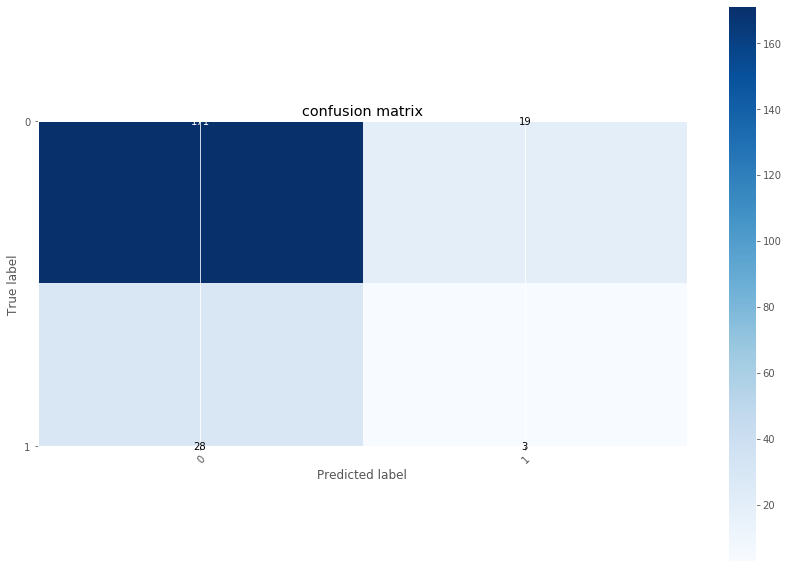

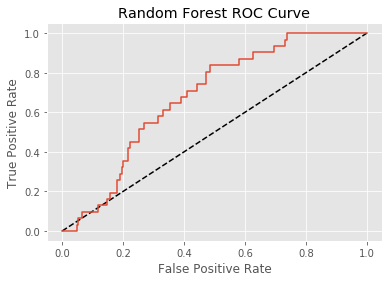

              precision    recall  f1-score   support

       False       0.90      0.86      0.88       199
        True       0.10      0.14      0.11        22

    accuracy                           0.79       221
   macro avg       0.50      0.50      0.50       221
weighted avg       0.82      0.79      0.80       221

AUC score is 0.4983870967741935
recall on test set is  0.0967741935483871
recall on training set is  0.8125
accuracy on training set is  0.9128
accuracy on test set is  0.7873303167420814
W7Fat5YP_Agree                                       0.007847
W7OwnCarYP_Yes                                       0.007988
W6GrantRecYP0c_Not mentioned                         0.008304
W7Fat1YP_Disagree                                    0.008309
W7Hous12bYP_Being bought on a mortgage/ bank loan    0.009069
W5FundstudYP0b_Mentioned                             0.009129
W7DlicenceYP_No                                      0.009418
W7PdwrkYP0b_No                                     

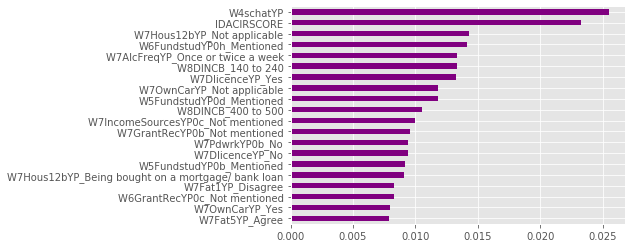

In [271]:
#with class weights
param_grid = {"max_depth":[5, 10, 20, 30, 50], 
              "min_samples_leaf":[100, 50, 40, 30, 20, 10, 5],
              "max_features":[round(sqrt(X_train.shape[1])), round(log(X_train.shape[1])/log(2))]}
              

rf_grid = RandomForestClassifier(random_state = SEED, class_weight = "balanced_subsample")

model_rf = grid_cv_model(rf_grid, param_grid, X_train, y_train, X_test, score = "roc_auc")

evaluate_model(model_rf, X_train, y_train, X_test, y_test, treshold = 0.5, multi_class = False)


# Question on weird shit

In [ ]:
#Why the fuck different?
temp[["W8DINCB", "W8DINCW"]].head(100)

In [ ]:
#2) Why the fuck removed W8STUDYHRS
#3) W8NETW weekly take home pay, how different than W8DINCW


In [372]:
10**9 + 7

1000000007